In [1]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('USDJPY_1h.csv')
data = data.drop_duplicates(keep=False)
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True).dt.tz_localize(None)

data = data.set_index('timestamp')
data = data[['open', 'high', 'low', 'close', 'volumn']]
data

,open,high,low,close,volumn
timestamp,,,,,
2021-11-04 17:00:00,113.750000,113.750999,113.620003,113.680000,0
2021-11-04 18:00:00,113.680000,113.740997,113.639999,113.738998,0
2021-11-04 19:00:00,113.737000,113.787003,113.669998,113.702003,0
2021-11-04 20:00:00,113.700996,113.779999,113.680000,113.746002,0
2021-11-04 21:00:00,113.733002,113.769997,113.692001,113.740997,0
...,...,...,...,...,...
2022-08-30 12:00:00,138.197998,138.501007,138.160004,138.492996,0
2022-08-30 13:00:00,138.490997,138.561005,138.139999,138.386002,0
2022-08-30 14:00:00,138.382996,139.080002,138.360001,138.886002,0


In [30]:
price = data.close.copy() # data.close.iloc[:500]

max_idx = list(argrelextrema(price.values, np.greater, order=10)[0])
min_idx = list(argrelextrema(price.values, np.less, order=10)[0])

idx = max_idx + min_idx
idx.sort()
peaks = price.values[idx]

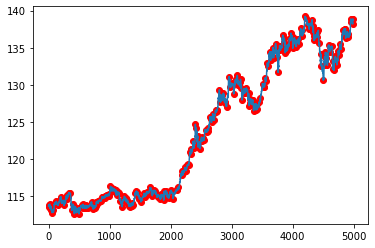

In [4]:
plt.plot(price.values)
plt.scatter(idx, peaks, c='r')
plt.show()

In [41]:
# argrelextrema example
x = np.array([2, 1, 2, 3, 2, 0, 1, 0, 1, 4, 2, 0])
ex = argrelextrema(x, np.greater, order=4)
x[ex[0]]

array([3, 4])

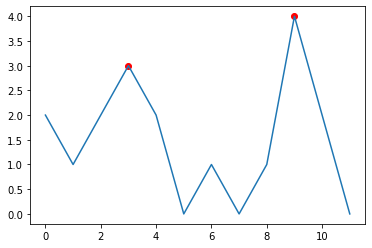

In [42]:
# argrelextrema example plot
plt.plot(x)
plt.scatter(ex, x[ex[0]], c='r')
plt.show()

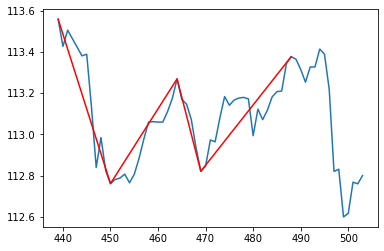

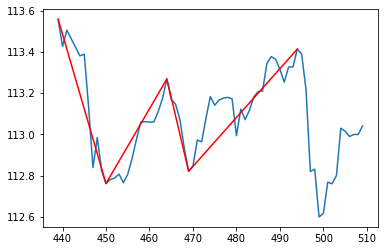

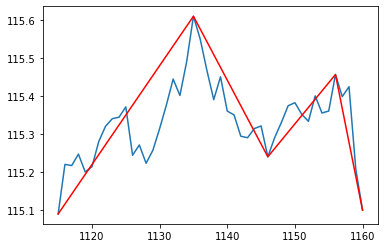

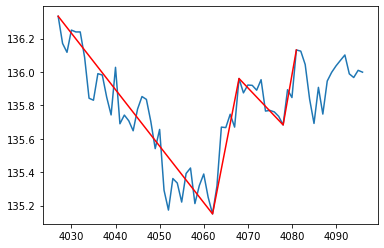

In [8]:
err_allowed = 10.0 / 100 # % error
for i in range(100, len(price)):
    
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=10)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=10)[0])
    
    idx = max_idx + min_idx + [len(price.values[:i]) - 1]
    idx.sort()
    current_idx = idx[-5:]
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price.values[current_idx]
    
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]    
    BC = current_pat[3] - current_pat[2]    
    CD = current_pat[4] - current_pat[3]    
        
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        
        # Gartley Pattern
        AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
        BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
        CD_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(BC)
        
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
              
            plt.plot(np.arange(start, i), price.values[start:i])
            plt.plot(current_idx, current_pat, c='r')
            plt.show()
            
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        
        # Gartley Pattern
        AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
        BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
        CD_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(BC)
        
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
              
            plt.plot(np.arange(start, i+15), price.values[start:i+15])
            plt.plot(current_idx, current_pat, c='r')
            plt.show()

In [22]:
def find_peak(price, i, order):
    
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=order)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=order)[0])
    
    idx = max_idx + min_idx + [len(price.values[:i]) - 1]
    idx.sort()
    current_idx = idx[-5:]
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price.values[current_idx]
    
    return current_pat, current_idx, start, end

In [31]:
def find_pattern(current_pat, err_allowed):
    
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]    
    BC = current_pat[3] - current_pat[2]    
    CD = current_pat[4] - current_pat[3]
    
    patterns_info = [
        { 'name': 'Gartley', 'AB': [0.618, 0.618], 'BC': [0.382, 0.886], 'CD': [1.27, 1.618] },
        { 'name': 'Butterfly', 'AB': [0.786, 0.786], 'BC': [0.382, 0.886], 'CD': [1.618, 2.24] },
        { 'name': 'Bat', 'AB': [0.382, 0.5], 'BC': [0.382, 0.886], 'CD': [1.618, 2.618] },
        { 'name': 'Crab', 'AB': [0.382, 0.618], 'BC': [0.382, 0.886], 'CD': [2.618, 3.618] }
    ]
    
    for pattern in patterns_info:
        
        AB_range = np.array([pattern['AB'][0] - err_allowed, pattern['AB'][1] + err_allowed]) * abs(XA)
        BC_range = np.array([pattern['BC'][0] - err_allowed, pattern['BC'][1] + err_allowed]) * abs(AB)
        CD_range = np.array([pattern['CD'][0] - err_allowed, pattern['CD'][1] + err_allowed]) * abs(BC)

        if XA > 0 and AB < 0 and BC > 0 and CD < 0: # Bullish

            if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
                return pattern['name'], 'Bullish'

        elif XA < 0 and AB > 0 and BC < 0 and CD > 0: # Bearish

            if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
                return pattern['name'], 'Bearish'
        
    return False, False

Bearish Gartley


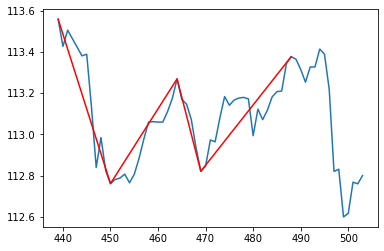

Bearish Gartley


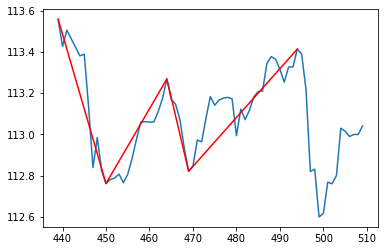

Bullish Butterfly


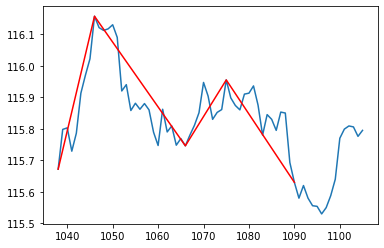

Bullish Butterfly


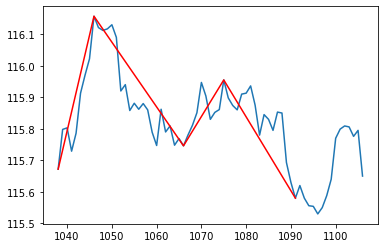

Bullish Butterfly


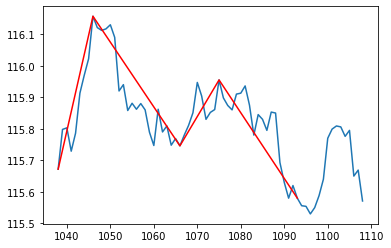

Bullish Butterfly


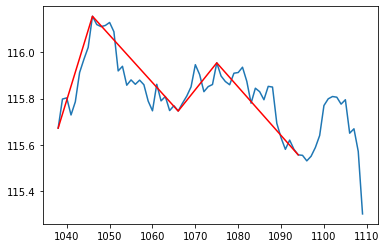

Bullish Butterfly


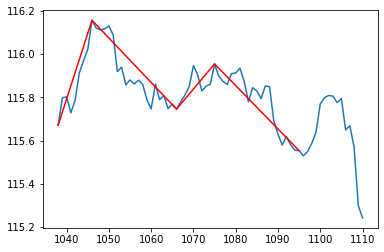

Bullish Butterfly


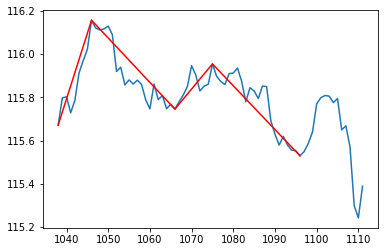

Bullish Gartley


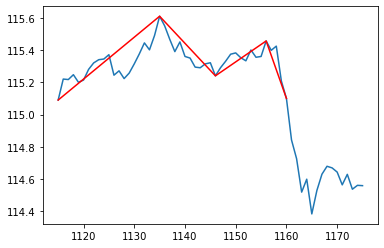

Bullish Crab


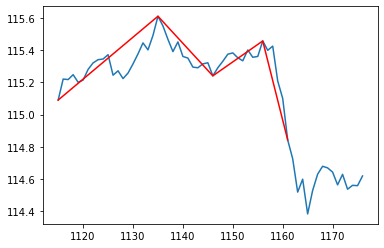

Bullish Crab


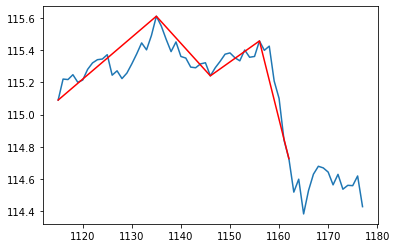

Bullish Bat


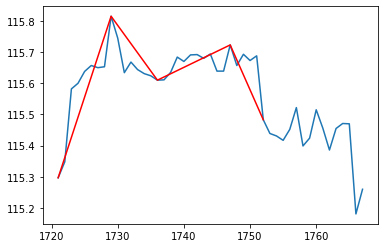

Bullish Bat


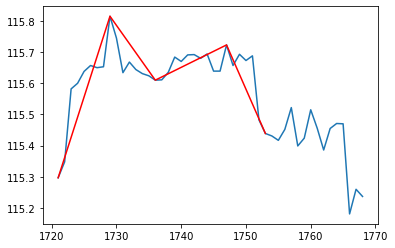

Bullish Bat


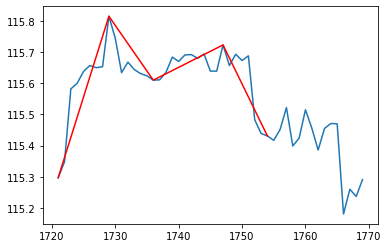

Bullish Bat


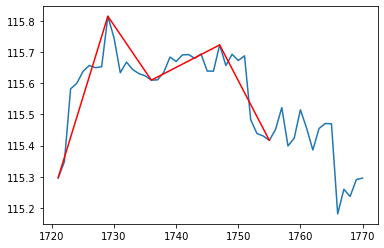

Bullish Crab


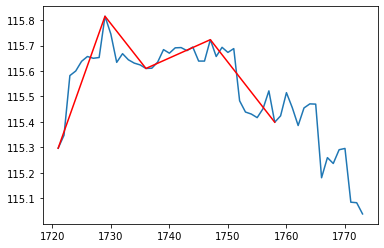

Bullish Crab


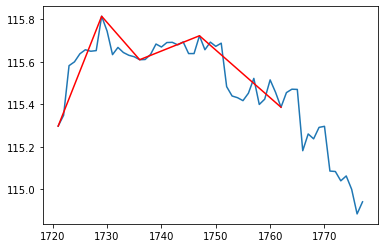

Bearish Butterfly


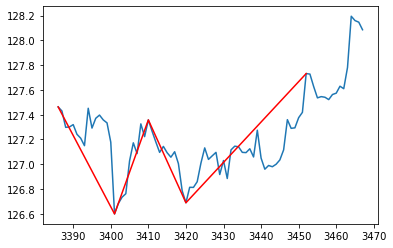

Bearish Butterfly


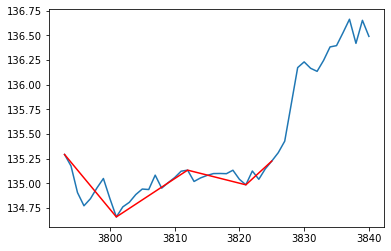

Bearish Butterfly


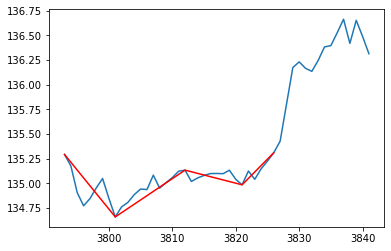

Bullish Bat


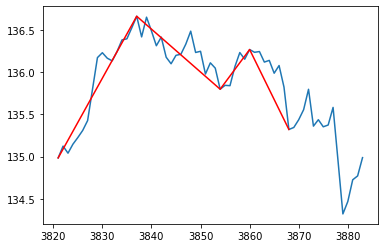

Bullish Crab


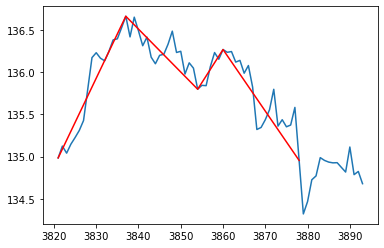

Bearish Gartley


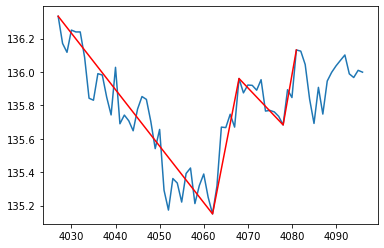

Bullish Bat


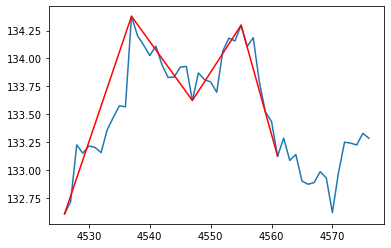

Bullish Bat


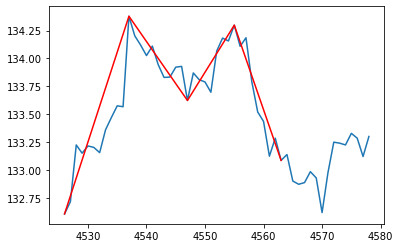

Bullish Bat


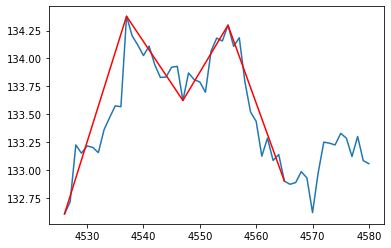

Bullish Bat


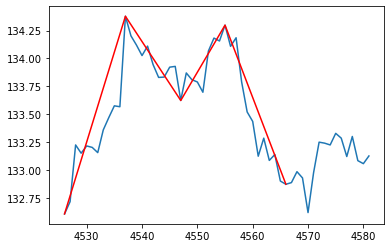

Bullish Bat


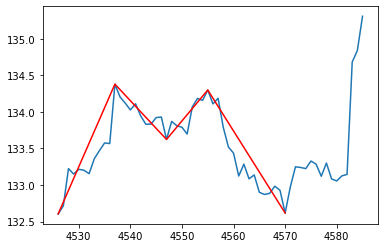

Bullish Bat


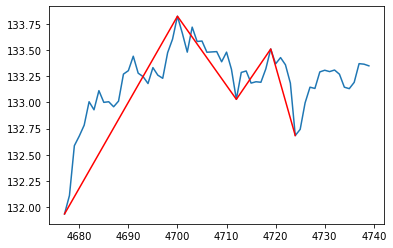

Bullish Bat


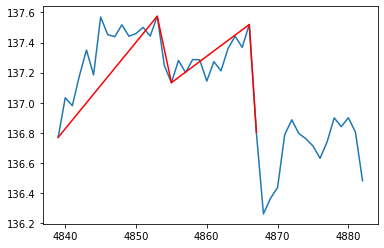

Bullish Crab


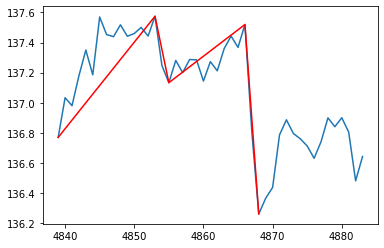

In [33]:
err_allowed = 10.0 / 100 # % error
for i in range(100, len(price)):
    
    current_pat, current_idx, start, end = find_peak(price, i, 10)
    pattern, direction = find_pattern(current_pat, err_allowed)
    
    if pattern is not False:
        
        print(direction, pattern)
        plt.plot(np.arange(start, i+15), price.values[start:i+15])
        plt.plot(current_idx, current_pat, c='r')
        plt.savefig('my_plot.png')
        plt.show()